<a href="https://www.kaggle.com/code/omarjfr/simple-face-recognition-system-for-beginners?scriptVersionId=195496245" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install face-recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 72.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for dlib: filename=dlib-19.24.6-cp310-cp310-linux_x86_64.whl size=3590661 sha256=d039c6fd6845b3df58f8cf672252e334adbda22b3334df0004240f7200da91da
  Stored in directory: /root/.cache/pip/wheels/7c/1d/d1/e69ceb001441acedfa6156acda6c1856699e260ea1a9e6dcc4
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566163 sha256=5f8e8f565fcb65a6e3ce330e058f93f7e2aa0c3d82c6907ff4dde2ced0207732
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built dlib face-recognition-models


## This process demonstrates how to use a simple face recognition system **Easilyyyy** with a KNN classifier:

### 1. Loading and Encoding Images: We load images from a dataset, encode the faces, and store these encodings along with their corresponding labels.

### 2. Training the KNN Classifier: Using the encoded images, we train a KNN classifier to learn to recognize faces.

### 3. Evaluating the Model.

### 4. Detecting Faces: Finally, we use the trained model to detect and recognize faces in new images or video frames.

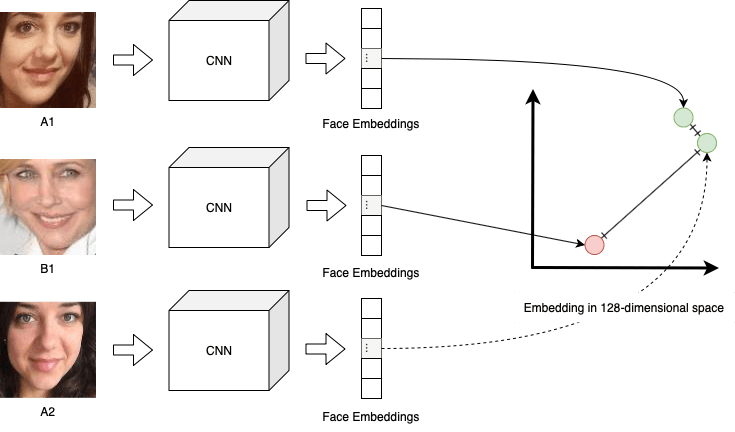

In [2]:
from IPython.display import Image, display
display(Image(filename='/kaggle/input/feature-vs/Vectors.png'))

In [3]:
import face_recognition
import cv2
import os
import glob
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [4]:
class SimpleFacerec:
    def __init__(self):
        self.known_face_encodings = []
        self.known_face_names = []
        self.knn_clf = None
        self.frame_resizing = 0.25 # for speed encoding
        
        
        
    # First function to get vectors with face names
    def load_encoding_images(self, dataset_path):
        # Loop over each person’s folder in the dataset
        people_folders = os.listdir(dataset_path)
        for person in people_folders:
            person_folder = os.path.join(dataset_path, person)
            
            # Only process if it's a directory (to ignore any non-directory files)
            if os.path.isdir(person_folder):
                # Get all image paths in the person's folder
                images_path = glob.glob(os.path.join(person_folder, "*.*"))
                print(f"{len(images_path)} encoding images found for {person}")

                # Process each image
                for img_path in images_path:
                    img = cv2.imread(img_path)
                    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    
                    # Get the encoding for the image
                    img_encoding = face_recognition.face_encodings(rgb_img)
                    
                    # Only process the image if a face encoding was found
                    if img_encoding:
                        # Store the encoding and the person's name (folder name)
                        self.known_face_encodings.append(img_encoding[0])
                        self.known_face_names.append(person)
        
        print("Encoding images loaded.")
        
        


    # Second Function to train and evaluate KNN model after get vectors as an input and labels.
    def train_and_evaluate(self):
        # Convert the lists to numpy arrays
        X = np.array(self.known_face_encodings)
        y = np.array(self.known_face_names)
        
        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Initialize and train KNN classifier
        self.knn_clf = KNeighborsClassifier(n_neighbors=1, algorithm='ball_tree')
        self.knn_clf.fit(X_train, y_train)
        print("KNN classifier trained.")

        # Predict on the test set
        y_pred = self.knn_clf.predict(X_test)

        # Print evaluation metrics
        print("Evaluation Metrics:")
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
        print(classification_report(y_test, y_pred))
        
    
    
    # Third Function to use it in video frames.
    def detect_known_faces(self, frame):
        # Resize frame for faster processing speed
        small_frame = cv2.resize(frame, (0, 0), fx=self.frame_resizing, fy=self.frame_resizing)
        rgb_small_frame = cv2.cvtColor(small_frame, cv2.COLOR_BGR2RGB)
        face_locations = face_recognition.face_locations(rgb_small_frame)
        face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)
        
        face_names = []
        for face_encoding in face_encodings:
            # Use the KNN classifier to find the best match
            distances, indices = self.knn_clf.kneighbors([face_encoding])
            name = "Unknown"
            
            # Check if the best match is sufficiently close
            if distances[0][0] < 0.6:  # Adjust the threshold as needed
                name = self.known_face_names[indices[0][0]]
            
            face_names.append(name)

        face_locations = np.array(face_locations)
        face_locations = face_locations / self.frame_resizing
        return face_locations.astype(int), face_names

#### Load encoding images from the dataset

In [5]:
sfr = SimpleFacerec()
dataset_path = "/kaggle/input/face-recognition-dataset/Original Images/Original Images"
sfr.load_encoding_images(dataset_path)

79 encoding images found for Alia Bhatt
78 encoding images found for Charlize Theron
91 encoding images found for Zac Efron
98 encoding images found for Billie Eilish
108 encoding images found for Jessica Alba
102 encoding images found for Priyanka Chopra
105 encoding images found for Natalie Portman
101 encoding images found for Hrithik Roshan
58 encoding images found for Tom Cruise
77 encoding images found for Roger Federer
106 encoding images found for Henry Cavill
74 encoding images found for Amitabh Bachchan
120 encoding images found for Brad Pitt
61 encoding images found for Dwayne Johnson
30 encoding images found for Kashyap
71 encoding images found for Elizabeth Olsen
87 encoding images found for Camila Cabello
115 encoding images found for Vijay Deverakonda
80 encoding images found for Courtney Cox
75 encoding images found for Ellen Degeneres
72 encoding images found for Margot Robbie
68 encoding images found for Anushka Sharma
70 encoding images found for Lisa Kudrow
32 encod

#### Train and evaluate the KNN classifier

In [6]:
sfr.train_and_evaluate()

KNN classifier trained.
Evaluation Metrics:
Accuracy: 1.00
                    precision    recall  f1-score   support

      Akshay Kumar       1.00      1.00      1.00        10
Alexandra Daddario       1.00      1.00      1.00        15
        Alia Bhatt       0.93      1.00      0.97        14
  Amitabh Bachchan       1.00      1.00      1.00        14
      Andy Samberg       1.00      1.00      1.00        15
    Anushka Sharma       1.00      1.00      1.00        17
     Billie Eilish       0.95      1.00      0.97        18
         Brad Pitt       1.00      1.00      1.00        28
    Camila Cabello       1.00      0.89      0.94        19
   Charlize Theron       1.00      1.00      1.00        10
       Claire Holt       1.00      1.00      1.00        20
      Courtney Cox       1.00      1.00      1.00        22
    Dwayne Johnson       1.00      1.00      1.00         9
   Elizabeth Olsen       1.00      1.00      1.00        13
   Ellen Degeneres       1.00      1.00 